## 1. Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# read csv
cats_df = pd.read_csv('./cats.csv')
cats_df.head()

,Unnamed: 0,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
0,0,7.0,Siamese,2009-08-02 14:02:18,0.883886,21.611951,5,4.0
1,1,9.0,Siamese,2013-11-27 19:08:52,1.221535,26.451956,10,4.0
2,2,8.0,Manx,2016-01-12 04:39:24,0.967718,18.540191,10,5.0
3,3,8.0,Maine Coon,2000-11-24 18:51:18,1.090641,16.564362,12,7.0
4,4,8.0,Maine Coon,2014-07-03 22:17:26,1.004712,22.535495,7,7.0


In [7]:
# drop irrelevant columns
cats_df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
# basic overview
# to check correct datatype
cats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age at death            299 non-null    float64
 1   breed                   300 non-null    object 
 2   date of last vet visit  300 non-null    object 
 3   hair length             299 non-null    float64
 4   height                  300 non-null    float64
 5   number of vet visits    300 non-null    int64  
 6   weight                  300 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 16.5+ KB


#### Check nan values

In [9]:
# check nan
cats_df.isna().sum()

age at death              1
breed                     0
date of last vet visit    0
hair length               1
height                    0
number of vet visits      0
weight                    0
dtype: int64

In [10]:
# target nan value needs to be dropped
print(cats_df[cats_df['age at death'].isna()], end='\n\n')
cats_df.drop(258, inplace=True)
# 
print(cats_df[cats_df['hair length'].isna()])

     age at death       breed date of last vet visit  hair length     height  \
258           NaN  Maine Coon    2010-09-16 08:07:38     0.979556  26.055971   

     number of vet visits  weight  
258                     1     8.0  

     age at death breed date of last vet visit  hair length     height  \
271           6.0  Manx    2001-02-13 02:04:31          NaN  21.520845   

     number of vet visits  weight  
271                     7     7.0  


In [11]:
cats_df.loc[271,'hair length'] = \
cats_df[cats_df['breed'] == 'Manx']['hair length'].mean()

In [12]:
cats_df.isna().sum()

age at death              0
breed                     0
date of last vet visit    0
hair length               0
height                    0
number of vet visits      0
weight                    0
dtype: int64

## 2. Wrangling

### I. Date time check

In [13]:
# date to pandas date time conversion

# pd.to_datetime(cats_df['date of last vet visit'])

# To Fix
# ParserError: month must be in 1..12: 2009-22-12 02:43:43
# some data point has inconsistency in date format, In months to be exact
# date format is YYYY-MM-DD

# faulty data point
print(cats_df[cats_df['date of last vet visit'].apply(lambda x: int(x.split()[0].split('-')[1]) > 12)])

# fix no 47
# create copy
to_fix_temp = cats_df.iloc[47].copy()
to_fix_temp['date of last vet visit'] = '2009-12-22 02:43:43'
cats_df.iloc[47] = to_fix_temp
del(to_fix_temp)

    age at death breed date of last vet visit  hair length     height  \
47           8.0   Rex    2009-22-12 02:43:43     1.037497  27.393672   

    number of vet visits  weight  
47                     6     6.0  


In [14]:
# to date time
cats_df['date of last vet visit'] = pd.to_datetime(cats_df['date of last vet visit'])

In [15]:
# descriptive stats for date check
cats_df['date of last vet visit'].describe()

<ipython-input-15-db5fd8910d1a>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cats_df['date of last vet visit'].describe()


count                     299
unique                    299
top       2007-08-02 16:59:33
freq                        1
first     1997-01-25 05:17:01
last      2107-07-20 00:54:19
Name: date of last vet visit, dtype: object

In [16]:
# date range exceeds the current year
print(cats_df[cats_df['date of last vet visit'].dt.year > 2017])

# faulty year
# further eda required to determine if this datapoint belongs to year 2007 or 2017
# for now we drop it
cats_df.drop(238, inplace=True)

     age at death breed date of last vet visit  hair length    height  \
238          12.0   Rex    2107-07-20 00:54:19     0.913241  8.797789   

     number of vet visits  weight  
238                     4     4.0  


### II. Category check

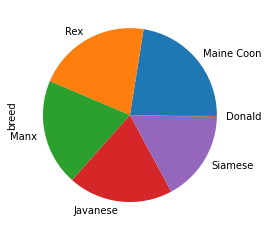

In [17]:
#calculate the percentage of each breed category.
cats_df.breed.value_counts(normalize=True)

#plot the pie chart of breed categories
cats_df.breed.value_counts(normalize=True).plot.pie()
plt.show()

In [18]:
# category overview
cats_df['breed'].value_counts()

Maine Coon    67
Rex           63
Manx          59
Javanese      58
Siamese       50
Donald         1
Name: breed, dtype: int64

Donald breed has only 1 datapoint.

### III. Numerical check

In [19]:
# descriptive stats
cats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age at death,298.0,8.996644e+00,2.892575e+00,0.000000,7.000000,9.000000,11.000000,1.800000e+01
hair length,298.0,3.037866e+09,5.244169e+10,0.690454,0.938083,1.004265,1.067898,9.052840e+11
height,298.0,2.051906e+01,5.069090e+00,5.077179,16.978839,20.825805,23.973393,3.304301e+01
number of vet visits,298.0,8.335570e+00,3.801667e+00,-1.000000,6.000000,8.000000,11.000000,1.900000e+01
weight,298.0,3.943960e+00,2.026885e+00,0.000000,2.000000,4.000000,5.000000,1.000000e+01


#### Findings:
1. Age at death:
- 0 age at death might be faulty
2. hair length:
- Mean is higher than median indicating presence of outlier
3. number of vet visits:
- -1 visits at vet
4. weight:
- 0 weight datapoint needs to be explored

hair length feature has extremities

#### a. hair length

In [20]:
print(cats_df[cats_df['hair length'] > 8])

     age at death breed date of last vet visit   hair length     height  \
108          10.0   Rex    2012-12-10 03:48:52  9.052840e+11  18.661543   

     number of vet visits  weight  
108                     9     2.0  


<AxesSubplot:>

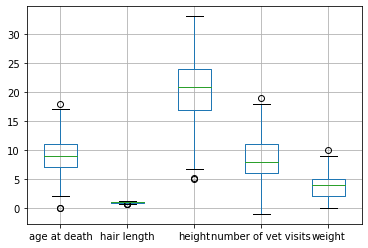

In [21]:
# dropping outlier
cats_df.drop(108, inplace=True)
cats_df.boxplot()

#### b. Age of death

In [22]:
# Age 0 at death
print(cats_df[cats_df['age at death'] < 1])

# age at 0 could be a misentry
cats_df.drop([164, 288], inplace=True)

     age at death     breed date of last vet visit  hair length     height  \
164           0.0       Rex    2007-07-20 22:28:24     0.936867  14.317804   
288           0.0  Javanese    2003-04-07 10:02:49     0.950070  24.419723   

     number of vet visits  weight  
164                     9     1.0  
288                    10     3.0  


#### c. number of vet visits

In [23]:
# faulty rows for number of vet visits
cats_df[cats_df['number of vet visits'] < 0]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
57,11.0,Manx,2011-11-12 23:23:01,0.868451,21.647929,-1,2.0
92,7.0,Maine Coon,2007-08-02 16:59:33,0.967941,8.624444,-1,3.0
294,13.0,Javanese,2015-01-27 23:23:42,1.085022,24.610927,-1,4.0


In [24]:
# fixing -1 by changing it to 0

cats_df['number of vet visits'] = \
cats_df['number of vet visits'].apply(lambda x: 0 if x == -1 else x)

#### d. weight

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [26]:
# faulty rows for weight of cats 
cats_df[cats_df['weight'] < 1]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
33,6.0,Maine Coon,2007-07-04 02:53:25,0.835610,16.848307,5,0.0
61,6.0,Maine Coon,2002-02-06 06:49:07,0.942037,23.571271,16,0.0
102,17.0,Rex,2007-11-27 07:35:08,1.086447,19.750088,9,0.0
114,11.0,Siamese,2014-08-14 22:01:44,1.190255,17.747619,6,0.0
131,6.0,Rex,2009-07-08 08:12:26,0.933132,20.619181,8,0.0
163,14.0,Maine Coon,2000-04-28 10:14:54,1.096407,22.907829,7,0.0
174,11.0,Maine Coon,2016-08-24 01:54:56,0.842447,15.286063,14,0.0
179,10.0,Manx,2005-08-20 12:28:46,0.909811,24.554019,5,0.0
214,6.0,Manx,2010-08-08 21:45:37,0.937148,12.019150,9,0.0
290,8.0,Javanese,2005-05-16 16:33:16,1.019894,17.027594,0,0.0


We will build a linear model for predicting weight. The features which will be used for modelling will be 'breed', 'height' and 'number of vet visits'

In [27]:
train = cats_df[~(cats_df['weight'] < 1)].copy()
train = train[['breed', 'height', 'number of vet visits', 'weight', 'age at death']]

In [28]:
ss = StandardScaler()
lr = LinearRegression()

train = pd.get_dummies(train, 'breed')

X = train.drop('weight', axis=1)
y = train['weight']

X = ss.fit_transform(X)

lr.fit(X, y)
lr.score(X, y)

0.01909185900110688

In [29]:
test = cats_df[cats_df['weight'] < 1][['breed', 'height', 'number of vet visits', 'weight', 'age at death']]
test = pd.get_dummies(test, 'breed')
test['breed_Donald'] = 0

X_ = test.drop('weight', axis=1)

X_ = ss.transform(X_)

In [30]:
cats_df.loc[cats_df['weight'] < 1, 'weight'] = lr.predict(X_)

<AxesSubplot:>

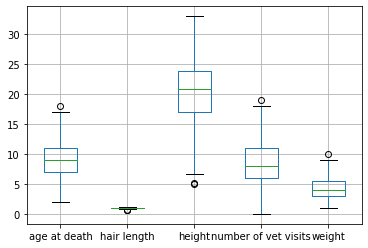

In [31]:
cats_df.boxplot()

## 3. Exploration

<AxesSubplot:>

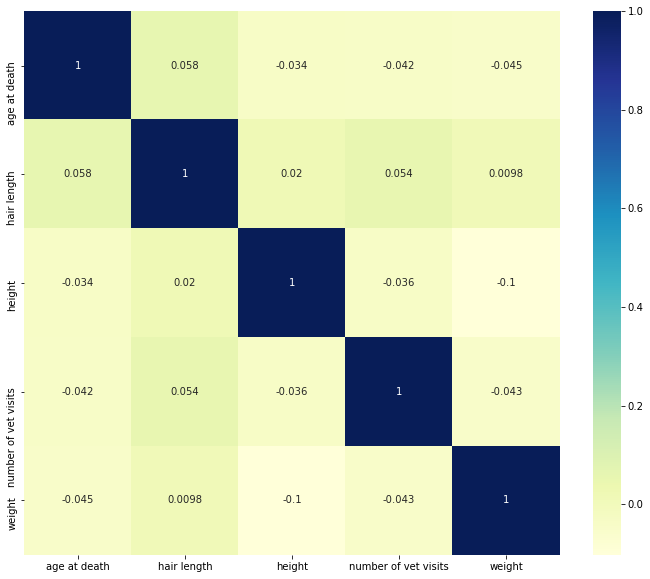

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(cats_df.corr(), cmap='YlGnBu', annot=True)

#### Findings:
- Weak correlation between features
- Weak linear relationship between features

## I. Bivariate Analysis

In [33]:
cats_df.columns

Index(['age at death', 'breed', 'date of last vet visit', 'hair length',
       'height', 'number of vet visits', 'weight'],
      dtype='object')

#### a. breed

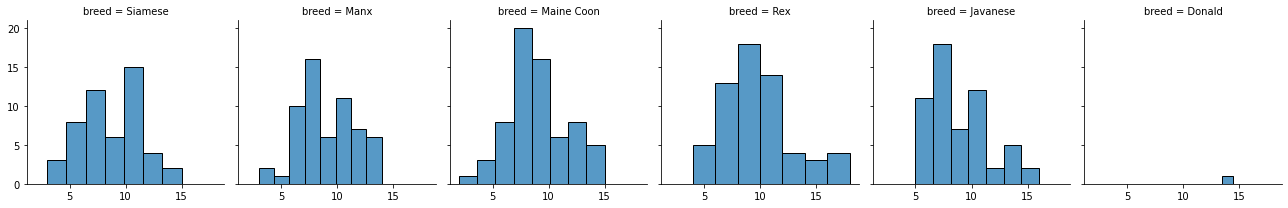

In [34]:
g = sns.FacetGrid(cats_df, col="breed")
g.map_dataframe(sns.histplot, x="age at death")

In [35]:
# descriptive stats
breed_ds_df = cats_df.groupby('breed')['age at death'].describe()
breed_ds_df['range'] = breed_ds_df['max'] - breed_ds_df['min']
breed_ds_df

,count,mean,std,min,25%,50%,75%,max,range
breed,,,,,,,,,
Donald,1.0,14.000000,NaN,14.0,14.0,14.0,14.0,14.0,0.0
Javanese,57.0,8.982456,2.682558,5.0,7.0,8.0,11.0,16.0,11.0
Maine Coon,67.0,9.000000,2.746899,2.0,7.0,9.0,11.0,15.0,13.0
Manx,59.0,9.135593,2.528852,3.0,8.0,9.0,11.0,14.0,11.0
Rex,61.0,9.295082,3.211149,4.0,7.0,9.0,11.0,18.0,14.0
Siamese,50.0,8.720000,2.843108,3.0,7.0,9.0,11.0,15.0,12.0


#### Findings:
- Most cats have same mean age i.e 9 years
- Rex breed seems to have the highest life expectancy and highest spread in life expectancy as well
- Maine Coon breed seems too have individuals with the least life expectancy
- Javanese has the lowest spread of all the other breeds

#### b. date of last vet visit

In [36]:
cats_df['year'] = cats_df['date of last vet visit'].dt.year
cats_df['month'] = cats_df['date of last vet visit'].dt.month

<AxesSubplot:xlabel='year', ylabel='age at death'>

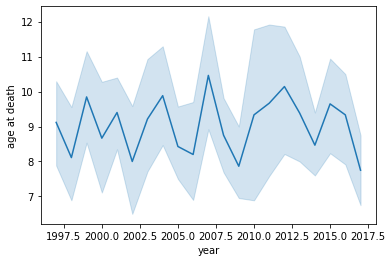

In [37]:
sns.lineplot(x='year', y='age at death', data=cats_df)

<AxesSubplot:xlabel='month', ylabel='age at death'>

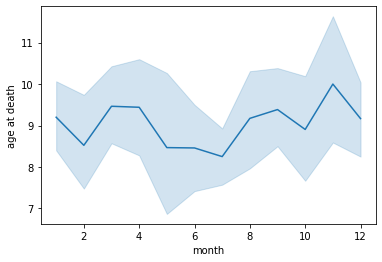

In [38]:
sns.lineplot(x='month', y='age at death', data=cats_df)

#### Findings:
- According to the dataset most cats have been deceased in 2007 and the lowest in 2002.
- Most of the cats deceased in month of November and the least in July

#### c. hair length

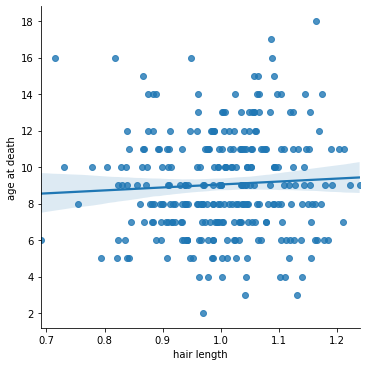

In [39]:
sns.lmplot(x='hair length', y='age at death', data=cats_df, order=1)

#### d. height

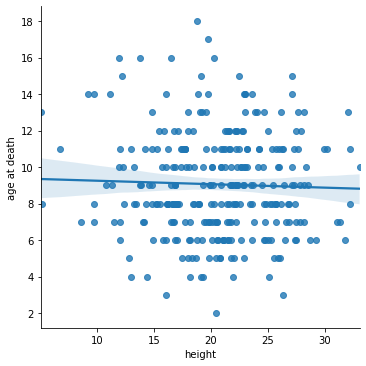

In [40]:
sns.lmplot(x='height', y='age at death', data=cats_df, order=1)

#### Findings:
- Age at death decreases at a low ratee as the height is increasing

#### e. number of vet visits

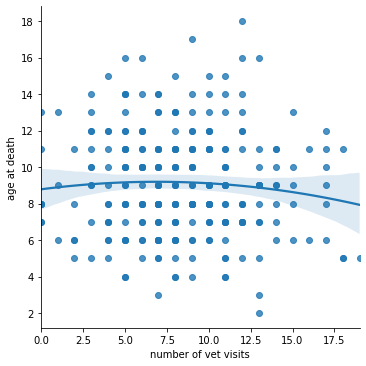

In [41]:
sns.lmplot(x='number of vet visits', y='age at death', data=cats_df, order=2)

#### Findings:
- Life expectancy increases as the number of visits increase upto a point
- More frequent visits to vet might be because of unwell condition.

#### f. weight

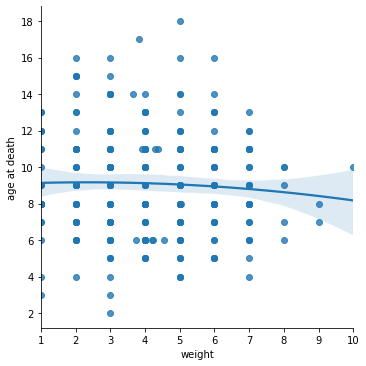

In [42]:
sns.lmplot(x='weight', y='age at death', data=cats_df, order=2)

#### Findings:
- Cats having more weight have less life expectancy

## 4. Modelling

In [43]:
import statsmodels.api as sm

In [44]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV, train_test_split

### Preprocessing

In [45]:
cats_df = cats_df.drop('date of last vet visit', axis=1)

In [46]:
# dummification
cats_df = pd.get_dummies(cats_df, 'breed')

In [47]:
# train test split sets

X_train, X_test, y_train, y_test = \
train_test_split(cats_df.drop('age at death', axis=1), 
                 cats_df['age at death'], 
                 test_size=0.25, 
                 random_state=2021)

In [48]:
# scaling
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### I. Linear Regression

In [49]:
lr = LinearRegression()

lr.fit(X_train, y_train)
print(f"R-Squared is {lr.score(X_train, y_train)}")

print(f"RMSE train set: {mean_squared_error(y_train, lr.predict(X_train))}")
print(f"RMSE test set: {mean_squared_error(y_test, lr.predict(X_test))}")

R-Squared is 0.02420526236273801
RMSE train set: 8.051620205294059
RMSE test set: 5.497527055345822e+26


In [50]:
X_train_ = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_)
res = model.fit()

In [51]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           age at death   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.5261
Date:                Sun, 08 Aug 2021   Prob (F-statistic):              0.871
Time:                        09:53:52   Log-Likelihood:                -544.05
No. Observations:                 221   AIC:                             1110.
Df Residuals:                     210   BIC:                             1147.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0452      0.196     46.200      0.000       8.659       9.431
x1             0.1491      0.198      0.752      0.453      -0.242       0.540
x2            -0.2757      0.201     -1.370      0.172      -0.672       0.121
x3            -0.1340      0.201     -0.666      0.506      -0.531       0.262
x4            -0.1723      0.199     -0.868      0.387      -0.564       0.219
x5            -0.1315      0.206     -0.638      0.524      -0.537       0.275
x6             0.2184      0.203      1.077      0.283      -0.181       0.618
x7         -4.907e-17   4.04e-17     -1.215      0.226   -1.29e-16    3.05e-17
x8             0.0390      0.162      0.240      0.810      -0.281       0.359
x9            -0.0950      0.160     -0.594      0.553      -0.410       0.220
x10            0.0292      0.158      0.185      0.853      -0.282       0.340
x11            0.0457      0.155      0.295      0.768      -0.259       0.351
x12           -0.0260      0.164     -0.158      0.874      -0.350       0.298
==============================================================================
Omnibus:                        2.583   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.593
Skew:                           0.260   Prob(JB):                        0.274
Kurtosis:                       2.892   Cond. No.                     2.73e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.52e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### II. Ridge Regression

In [52]:
r_lr = Ridge()

r_lr.fit(X_train, y_train)
print(f"R-Squared is {r_lr.score(X_train, y_train)}")

print(f"RMSE train set: {mean_squared_error(y_train, r_lr.predict(X_train))}")
print(f"RMSE test set: {mean_squared_error(y_test, r_lr.predict(X_test))}")

R-Squared is 0.024441538200184465
RMSE train set: 8.049670611559403
RMSE test set: 7.23667528081636


### II. Lasso Regression

In [53]:
l_lr = Lasso()

l_lr.fit(X_train, y_train)
print(f"R-Squared is {l_lr.score(X_train, y_train)}")

print(f"RMSE train set: {mean_squared_error(y_train, l_lr.predict(X_train))}")
print(f"RMSE test set: {mean_squared_error(y_test, l_lr.predict(X_test))}")

R-Squared is 0.0
RMSE train set: 8.251346205032656
RMSE test set: 6.724439535458966


### III. SGD Regression

In [54]:
sgd = SGDRegressor()

sgd.fit(X_train, y_train)
print(f"R-Squared is {sgd.score(X_train, y_train)}")

print(f"RMSE train set: {mean_squared_error(y_train, sgd.predict(X_train))}")
print(f"RMSE test set: {mean_squared_error(y_test, sgd.predict(X_test))}")

R-Squared is 0.024425415939711925
RMSE train set: 8.04980364191217
RMSE test set: 7.240244171101139


### IV. Random Forest

In [55]:
rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)
print(f"R-Squared is {rfr.score(X_train, y_train)}")

print(f"RMSE train set: {mean_squared_error(y_train, rfr.predict(X_train))}")
print(f"RMSE test set: {mean_squared_error(y_test, rfr.predict(X_test))}")

R-Squared is 0.8520488781749065
RMSE train set: 1.22079592760181
RMSE test set: 7.230472972972974


In [56]:
print(rfr.get_params())

param_grid = {
    'n_estimators':[25, 50, 100, 125],
    'max_depth':[4, 6, 8],
    'min_samples_leaf':[2, 4, 6],
    'min_samples_split':[2, 4, 6]
}

grid_reg = GridSearchCV(rfr, param_grid, scoring='r2', cv=5, n_jobs=-1)

grid_reg.fit(X_train, y_train)

print(f"Best Parameters: {grid_reg.best_params_}")
print(f"Best Score: {grid_reg.best_score_}")

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 125}
Best Score: -0.06805673621560471


In [57]:
rfr.set_params(**grid_reg.best_params_)

rfr.fit(X_train, y_train)
print(f"R-Squared is {rfr.score(X_train, y_train)}")

print(f"RMSE train set: {mean_squared_error(y_train, rfr.predict(X_train))}")
print(f"RMSE test set: {mean_squared_error(y_test, rfr.predict(X_test))}")

R-Squared is 0.431700215270173
RMSE train set: 4.689238272051333
RMSE test set: 6.993645818685845


### V. AdaBoostRegressor

In [58]:
abr = AdaBoostRegressor(n_estimators=50, learning_rate=0.5)

abr.fit(X_train, y_train)
print(f"R-Squared is {abr.score(X_train, y_train)}")

print(f"RMSE train set: {mean_squared_error(y_train, abr.predict(X_train))}")
print(f"RMSE test set: {mean_squared_error(y_test, abr.predict(X_test))}")

R-Squared is 0.2531755406487598
RMSE train set: 6.162307168493421
RMSE test set: 7.39571994154704


In [59]:
param_grid = {
    'n_estimators':[50, 100, 150, 200],
    'learning_rate':[0.5, 1.0, 1.5, 2.0]
}

grid_reg = GridSearchCV(abr, param_grid, scoring='r2', cv=5, n_jobs=-1)

grid_reg.fit(X_train, y_train)

print(f"Best Parameters: {grid_reg.best_params_}")
print(f"Best Score: {grid_reg.best_score_}")

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 150}
Best Score: -0.051022302356871926


In [60]:
abr.set_params(**grid_reg.best_params_)

abr.fit(X_train, y_train)
print(f"R-Squared is {abr.score(X_train, y_train)}")

print(f"RMSE train set: {mean_squared_error(y_train, abr.predict(X_train))}")
print(f"RMSE test set: {mean_squared_error(y_test, abr.predict(X_test))}")

R-Squared is 0.32175080023757696
RMSE train set: 5.596468960526105
RMSE test set: 7.367461429243599


### VI. GradientBoostingRegressor

In [61]:
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)
print(f"R-Squared is {gbr.score(X_train, y_train)}")

print(f"RMSE train set: {mean_squared_error(y_train, gbr.predict(X_train))}")
print(f"RMSE test set: {mean_squared_error(y_test, gbr.predict(X_test))}")

R-Squared is 0.7772349114799034
RMSE train set: 1.8381118677740624
RMSE test set: 8.971052877577574


In [62]:
print(gbr.get_params())
param_grid = {
    'learning_rate':[0.1, 0.15, 0.2],
    'n_estimators':[25, 50, 100],
    'alpha':[0.5, 0.9, 1.2],
    'subsample':[0.2, 0.5, 1.0],
    'min_samples_leaf':[1, 2, 3],
    'min_samples_split':[2, 4, 6]
}

grid_reg = GridSearchCV(gbr, param_grid, scoring='r2', cv=5, n_jobs=-1)

grid_reg.fit(X_train, y_train)

print(f"Best Parameters: {grid_reg.best_params_}")
print(f"Best Score: {grid_reg.best_score_}")

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best Parameters: {'alpha': 0.9, 'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 25, 'subsample': 0.5}
Best Score: -0.08289785432453597


In [63]:
gbr.set_params(**grid_reg.best_params_)

gbr.fit(X_train, y_train)
print(f"R-Squared is {gbr.score(X_train, y_train)}")

print(f"RMSE train set: {mean_squared_error(y_train, gbr.predict(X_train))}")
print(f"RMSE test set: {mean_squared_error(y_test, gbr.predict(X_test))}")

R-Squared is 0.4041617868088687
RMSE train set: 4.91646737922808
RMSE test set: 7.5035117926304995
